# Homework 5: Investigating Classification 🔬

Name: Riley Hager

Student ID: 455336
Received help from TA's at Sunday TA hours (3/3) and Monday TA hours (3/4).

Collaborated with: Katherine Laue (454984) and Evan Molyneaux (457888)
Gave advice to: Giorgio Gutilla (I do not know if this is the correct spelling/I also do not know his ID number. I 

## Instructions

For this homework, work through **Lab 5 (Detecting Breast Cancer using Logistic Regression)** first. Most of the things we ask you to do in this homework are explained in the lab. In general, you should feel free to import any package that we have previously used in class.

### Submission instructions
* Submit this python notebook including your answers in the code cells as homework submission.
* **Do not change the number of cells!** Your submission notebook should have exactly one code cell per problem. 
* Do **not** remove the `# your code here` line and add your solution **after** that line. 

## 1. Studying Confusion Matrices

In the lab, we implemented Logistic Regression as described and formulated in class. In this series of problems, we will first review the model and practice building one with `sklearn`, and then, once we are comfortable with the model itself, we will use it to investigate the confusion matrices we introduced in the lab.

Before we begin, we will need to prepare our data. In this assignment, we will once again use the Breast Cancer Dataset that we were introduced to in the lab.

In [303]:
from sklearn.datasets import load_breast_cancer

data = load_breast_cancer()
X, y = data.data, data.target


### Training and Fitting the Model

Let's briefly go over how to create and fit a Logistic Regression model with `sklearn`. This process is very similar to the one we used to build Linear Regression models in homework 4.

### Problem 1

First, we will begin by creating training and test sets with which we will build and evaluate our model with. Then, we will create a new instance of a `LogisticRegression` model and fit it with our training set.

**Try this!** In the following cell, you should do the following:
1. Creates a train/test split with `train_test_split` with a `test_size` of 0.3, stratification by `y` with `stratify`, and a `random_state` of 4.
2. Creates a new `LogisticRegression` model with the `'liblinear'` `solver` and `fit` it with the training set.
3. Evaluate the performance by manually computing and printing the classification _accuracy_ of your trained model on the test set.

> Hint: Feel free to refer to any official documentation and remember that you can easily view the documentation in your notebook for any function or object by adding a `?` after its name (eg. `train_test_split?`).

In [304]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import numpy as np 

# your code here
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=4)
model = LogisticRegression(solver='liblinear')
model.fit(X_train, y_train)
print(model.score(X_test, y_test))

0.9473684210526315


### Problem 2

**Write-up!** Why do we use `stratify` when creating our training and testing sets for this dataset? How would our evaluation of the model be affected if we did not use `stratify`? `HINT` Review the discussion of `stratify` from Lab 5.

### Reviewing Confusion Matrices

In the lab, we introduced the idea that there are several distinct types of mistakes, or errors, that a classifier can make: false positives and false negatives. We also looked into how we can interpret the performance of our classifier at a deeper level using a confusion matrix.

### Problem 3

**Write-up!** What are false positives and false negatives and why do we care to distinguish between them when they are both errors made by our classifier model? In the context of classifying tumors as either malignant or benign, does it make sense to prefer one type of mistake over the other? If so, which one and why? If not, also explain why?

### Problem 4

As shown in Lab 5, we can use a [confusion matrix](https://en.wikipedia.org/wiki/Confusion_matrix) to summarize and visualize the performance of our classifier.

**Try this!** In the following cell, use `confusion_matrix` from `sklearn.metrics` to compute the confusion matrix for the model you built in [Problem 1](#Problem-1). Then, use `plot_confusion_matrix` to visualize the matrix (you will need to specify the `labels` to use). `HINT` Again, feel free to refer to any official documentation and remember that you can easily view the documentation for a function or object by adding a `?` after its name (eg. `confusion_matrix?`).

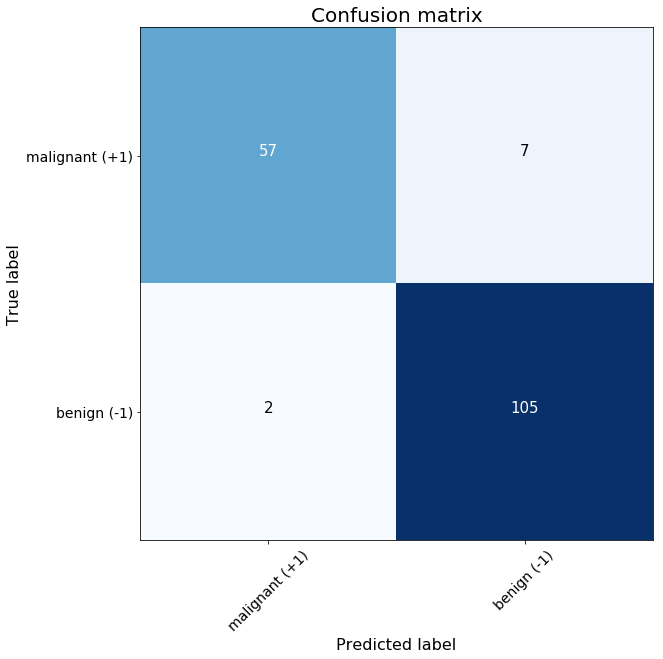

In [305]:
from sklearn.metrics import confusion_matrix
from utility.util import plot_confusion_matrix

# your code here
w = model.fit(X_train, y_train)
y_prediction = model.predict(X_test)
classes = [0, 1]
class_names = ['malignant (+1)', 'benign (-1)']

cnf_matrix = confusion_matrix(y_test, y_prediction, labels=classes)
plot_confusion_matrix(cnf_matrix, labels=class_names)

### Experiment: Making Decisions

Now, let's take a look at decision boundaries. As we mentioned in both lecture and lab, label predictions (eg. $\hat{y} = +1$) are made by considering the class probabilities $P(y = +1 \mid x)$ produced by our model with a decision threshold. Typically, we use a threshold of 0.5 such that $\hat{y} = +1$ if $P(y = +1 \mid x) > 0.5$. However, as we hinted in [Problem 3](#Problem-3), there are situations and contexts in which the cost of making a _false positive_ error is greater than making a _false negative_ error. We can account for cost differences by adjusting the threshold, and therefore the decision boundary, of our classifier.

In the following few cells, we will prepare an experiment to test and observe the effects of changing the decision threshold of our classification model.

### Problem 5

The first thing we will need to prepare is a way to compute the predictions of a model given a threshold. This is because `sklearn` does not offer an option to do this.

**Try this!** Complete the `make_predictions` function so that it computes the predicted labels `y_pred` for data `X_test` with a given `model` and decision `threshold`. `HINT` You may find the `model.predict_proba` method and [this StackOverflow thread](https://stackoverflow.com/questions/30820962/splitting-columns-of-a-numpy-array-easily) to be helpful.

In [306]:
def make_predictions(model, X_test, threshold=0.5):
    '''
    Computes the predicted labels for points in X_TEST using a given MODEL and THRESHOLD
    '''
    
    # your code here
    
    N = X_test.shape[0]
    y_pred = np.ones(N)
    p = model.predict_proba(X_test)
    x, y = p.T
    y_pred[x<=threshold] = 1
    y_pred[x>threshold] = 0
    
    assert isinstance(y_pred, np.ndarray), 'Labels should be returned as a NumPy array'
    assert y_pred.shape[0] == N, 'There should be the same number of labels as their are points in X'
    return y_pred
make_predictions(model, X_test)

array([0., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 0., 1., 0., 1., 1.,
       1., 1., 1., 0., 0., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1.,
       1., 0., 1., 1., 0., 0., 1., 1., 0., 1., 1., 1., 0., 0., 0., 1., 0.,
       0., 1., 0., 1., 1., 1., 1., 0., 1., 1., 1., 0., 1., 1., 1., 1., 0.,
       0., 1., 1., 1., 0., 1., 1., 1., 1., 0., 1., 1., 0., 1., 0., 0., 1.,
       0., 1., 1., 0., 0., 1., 0., 1., 1., 1., 0., 1., 1., 1., 0., 0., 1.,
       1., 1., 0., 1., 0., 1., 0., 1., 1., 0., 1., 1., 0., 1., 0., 1., 0.,
       1., 1., 0., 0., 1., 0., 0., 1., 1., 1., 1., 1., 0., 0., 0., 0., 1.,
       0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 0., 1., 1., 1., 0., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1.,
       0.])

### Problem 6

Next, we will combine all of the things we have done in earlier problems into a single function that produces a confusion matrix plot by fitting and evaluating new Logisitic Regression models with varying thresholds. Note that there will be some redundancy/inefficiency in this function because it repeatedly recomputes the same values, but it is okay as it simplifies the code.

**Try this!** Complete the `boundary_experiment` function so that it does the following:
1. Creates a train/test split with `train_test_split` with a `test_size` of 0.3, stratification by `y` with `stratify`, and a `random_state` of 11.
2. Creates a new `LogisticRegression` model with the `'liblinear'` `solver` and `fit` it with the training set.
3. Makes predictions `y_pred` for test set points using `make_predictions` and `threshold`.
4. Computes a confusion matrix and then plots it using `plot_confusion_matrix`.

`HINT` Feel free to refer to any official documentation and remember that you can easily view the documentation for a function or object by adding a `?` after its name (eg. `plot_confusion_matrix?`).

In [307]:
def boundary_experiment(X, y, threshold=0.5):
    
    # your code here
    X_train2, X_test2, y_train2, y_test2 = train_test_split(X, y, test_size=0.3, stratify=y, random_state=11)
    model2 = LogisticRegression(solver='liblinear')
    model2.fit(X_train2, y_train2)
    classes = [+1, -1]
    class_names = ['malignant (+1)', 'benign (-1)']
    y_prediction = make_predictions(model2, X_test2, threshold)
    cnf_matrix = confusion_matrix(y_test2, y_prediction)
    plot_confusion_matrix(cnf_matrix, class_names)
    


### Problem 7

In the following cell, we will experiment with how changing the decision boundary (threshold) affects the confusion matrix using the functions that you implemented earlier. In order to make the visualization work you will need to install an additional package, `ipywidgets`.

Use `conda install -c conda-forge ipywidgets` to install it and/or see [this article](https://ipywidgets.readthedocs.io/en/stable/user_install.html) for more detailed instructions.

**Try this!** Evaluate the following cell and experiment with the slider.

In [308]:
from ipywidgets import interactive, fixed

interactive(boundary_experiment, X=fixed(X), y=fixed(y), threshold=(0, 1, 0.05))

interactive(children=(FloatSlider(value=0.5, description='threshold', max=1.0, step=0.05), Output()), _dom_cla…

**Write-up!** How does changing the threshold affect the confusion matrix (eg. correct classifications and errors)? At which threshold value, if any, can we eliminate false positive errors? At which threshold, if any, can we eliminate false negative errors? In each case, explain whether or not we would want to do so?

## 2. An Explainable Classifier: Decision Trees

With the rapid development and advancement in artificial intelligence (AI) technologies, including the machine learning that we use in this class, there is an increasing concern over the ethics of AI. There are often situations where AI is used and in which it is critically important to be sure that a model is both reliable and correct. For many models, it is often difficult to explain why they produce the results that they do. These concerns have led to much debate and the advent of the [Explainable AI (XAI)](https://en.wikipedia.org/wiki/Explainable_Artificial_Intelligence) movement. The goal of XAI is to promote the development of AI whose actions and decisions can be easily understood by humans. Though not originally designed with XAI in mind, decision trees have increasingly become the focus of attention within this movement.

In the following section, we will introduce and explore, though not to great depths, what decision trees are and how they can be used as explainable classification models. We will later use this model to explore model complexity.

### How Do They Work?

Intuitively, a decision tree classifier tries to determine the class of a data point by making a series of "tests". Consider the following diagram of a decision tree that attempts to predict whether it will rain:

![dtree](utility/pics/decision-tree.png)

— [Source](https://prateekvjoshi.com/2016/03/22/how-are-decision-trees-constructed-in-machine-learning/)

At each level (or depth), a feature of the data is examined and and a decision is made. The outcomes of that decision are represented as branches of the tree. In the tree above, the first feature that is examined is temperature, and if the temperature is greater 70 degrees we will do one thing and if it is less than 70, we will do another thing.

What makes decision trees explainable is that we, as humans, can read off and follow exactly how the decision tree came to it's conclusion.

### Building Decision Trees

We will not discuss how decision trees are built in this course. Instead, we will opt to do do that for you. The following cell contains a function that takes a training set and produces a fit decision tree classification model.

The main thing to know about decision trees is that their complexity is directly determined by their depth. As we mentioned before, each level of depth in the tree is another set of decisions that the model can make. By increasing the depth of the tree, we increase the complexity of the model.

In [309]:
from sklearn.tree import DecisionTreeClassifier

def make_decision_tree(X_train, y_train, depth=None):
    return DecisionTreeClassifier(max_depth=depth, random_state=4).fit(X_train, y_train)

Let's try to build a decision tree to classify breast cancer tumors. We will reuse the training and testing sets we made earlier.

In [310]:
model = make_decision_tree(X_train, y_train)

In [311]:
model
#depth = 6
#.0232

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=4,
            splitter='best')

### Visualizing the Decision Tree

Again, the selling point of decision trees is that they are readily interpretable. Let's take a look at what our model looks like.

### Problem 8

The following cell produces text and encodes what the tree looks like. We will use a online tool called [Viz.js](http://viz-js.com/) to visualize the results.

**Try this!** Run the following cell and copy/paste the outputs in to [Viz.js](http://viz-js.com/). Then clear the outputs of the cell.

In [312]:
from sklearn.tree import export_graphviz

encoding = export_graphviz(model, impurity=False, filled=True, rounded=True,
                           feature_names=data.feature_names,
                           class_names=data.target_names)
print(encoding)

digraph Tree {
node [shape=box, style="filled, rounded", color="black", fontname=helvetica] ;
edge [fontname=helvetica] ;
0 [label="worst perimeter <= 105.95\nsamples = 398\nvalue = [148, 250]\nclass = benign", fillcolor="#399de568"] ;
1 [label="worst concave points <= 0.158\nsamples = 239\nvalue = [9, 230]\nclass = benign", fillcolor="#399de5f5"] ;
0 -> 1 [labeldistance=2.5, labelangle=45, headlabel="True"] ;
2 [label="area error <= 91.555\nsamples = 231\nvalue = [3, 228]\nclass = benign", fillcolor="#399de5fc"] ;
1 -> 2 ;
3 [label="worst smoothness <= 0.191\nsamples = 230\nvalue = [2, 228]\nclass = benign", fillcolor="#399de5fd"] ;
2 -> 3 ;
4 [label="mean fractal dimension <= 0.054\nsamples = 228\nvalue = [1, 227]\nclass = benign", fillcolor="#399de5fe"] ;
3 -> 4 ;
5 [label="mean smoothness <= 0.086\nsamples = 6\nvalue = [1, 5]\nclass = benign", fillcolor="#399de5cc"] ;
4 -> 5 ;
6 [label="samples = 5\nvalue = [0, 5]\nclass = benign", fillcolor="#399de5ff"] ;
5 -> 6 ;
7 [label="sample

**Write-up!** What was the maximum depth of the decision tree?

## 3. Model Selection
In the lecture we saw that higher-order polynomials can give us more complex models. Typically increasing model complexity can help improving the performance. However, only to a certain extent. At some point you start to overfit and the performance on a held-out test set will start to decrease again. For decision trees model complexity increases with the depth of the trees used. It is pretty easy to see that by using a sufficient number of splits, you can classify the entire training set correctly. That is classic _overfitting_. 

### Problem 9
Compute the training and validation error of the decision tree classifier for all depths from `1` to `10` and plot both curves in one figure.   

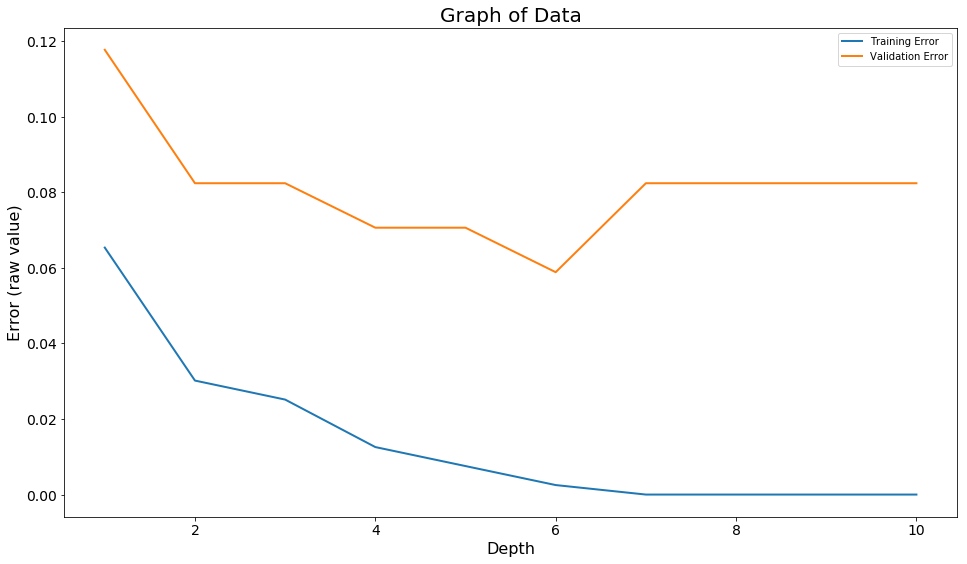

In [313]:
from sklearn.tree import DecisionTreeClassifier

X_train, X_rest, y_train, y_rest = train_test_split(X, y, test_size=0.3, stratify=y, random_state=10)
X_val, X_test, y_val, y_test = train_test_split(X_rest, y_rest, test_size=0.5, stratify=y_rest, random_state=10)


# your code here
import matplotlib.pyplot as plt
from utility.util import configure_plots



trainModelError = [];
valModelError = [];
depthArray = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10];

for i in range(1, 11):
    model = make_decision_tree(X_train, y_train, depth=i)
    trainModelError.append(1 - model.score(X_train, y_train))
    valModelError.append(1 - model.score(X_val, y_val))

    
configure_plots()

ax1 = plt.plot(depthArray, trainModelError, label="Training Error")
#[y==1, 0], trainModelError[y==1, 1]
ax2 = plt.plot(depthArray, valModelError, label="Validation Error")
#[y==-1, 0], valModelError[y==-1, 1]
plt.xlabel("Depth")
plt.ylabel("Error (raw value)")
plt.title("Graph of Data")
plt.legend()
plt.show()

**Write-up!** Which model (which depths) would you choose and why? 

### Problem 10 
Evaluate the model you selected above by computing the test error. Print the test error. 
> Hint: You will have to retrain your model. 

In [302]:
# your code here
selectedModel = make_decision_tree(X_train, y_train, depth=6)
selectedModel.fit(X_train, y_train)

#N = y_pred.shape[0]

#for i in range(1, 11):
#    model = make_decision_tree(X_train, y_train, depth=i)
#    trainModelErrorPercents.append((1 - model.score(X_train, y_train))*100)
#    valModelErrorPercents.append((1 - model.score(X_val, y_val))*100)


#numCorrect = 0
#for i in range(N):
#    if y_pred[i] == y_test[i]:
#       numCorrect += 1
#result = numCorrect/N
f'Error: {(1 - selectedModel.score(X_test, y_test)) * 100:0.5}%'

'Error: 2.3256%'